![lop](../../images/logo_diive1_128px.png)
# **Wind Direction Offset Correction**

**Notebook creation date**: 16 Apr 2023  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)
---
Example notebook for class `WindDirOffset` in `diive.pkgs.corrections.winddiroffset` of the time series processing library `diive`.  

# Overview

## Summary
The `WindDirOffset` class compares yearly wind direction histograms to a reference histogram build from specified reference years, detects yearly offsets in comparison to reference and corrects wind directions for detected yearly offsets.

## Data
- This example uses wind direction data 2005-2022 from the grassland site [CH-FRU](https://www.swissfluxnet.ethz.ch/index.php/sites/ch-fru-fruebuel/site-info-ch-fru/).
- All wind directions have been calculated assuming a sonic orientation of `0°` (north arrow of the sonic points to `0°`).

## Problem
- The wind directions from the site are wrong for some years because the **true**  orientation of the sonic anemometer was unknown.
- However, the sonic orientation of `0°` is correct for 2021 and 2022.

## Solution
- Calculate wind directions 2005-2022 using a sonic orientation setting of 0° for all years. Here, wind directions were calculated using [EddyPro](https://www.licor.com/env/support/EddyPro/software.html).
- Analyze and correct the wind direction time series 2005-2022 using the `WindDirOffset` class.
- As reference the the histogram of the wind direction data 2021-2022 is used. In these two years, the sonic orientation is known to be `0°`.


## Results
- Wind direction time series corrected for detected offsets.
- Overview of detected yearly offsets. These can be used to re-calculate wind directions. 
    - If the uncorrected sonic orientation was `0°` and the detected offset is `196` then the corrected sonic orientation would be `196°`.
    - If the uncorrected sonic orientation was `0°` and the detected offset is `-20` then the corrected sonic orientation would be `340°`.    

# Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from diive.configs.exampledata import load_exampledata_winddir
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.pkgs.corrections.winddiroffset import WindDirOffset

C:\Users\holukas\AppData\Local\pypoetry\Cache\virtualenvs\diive-HxUoW9nG-py3.9\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Show docstring

In [2]:
print(WindDirOffset.__name__)
print(WindDirOffset.__doc__)

WindDirOffset

    Compare yearly wind direction histograms to reference, detect
    offset in comparison to reference and correct wind directions
    for offset per year

    - Example notebook available in:
        notebooks/Corrections/WindDirectionOffset.ipynb
    


# Load example data

In [4]:
df = load_exampledata_winddir()
df

Loaded pickle F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_CH-FRU_2005-2022_winddirection_degrees.pickle (0.003 seconds).


,wind_dir
TIMESTAMP_MIDDLE,
2005-07-05 08:45:00,138.1020
2005-07-05 09:15:00,150.1690
2005-07-05 09:45:00,156.1880
2005-07-05 10:15:00,158.9610
2005-07-05 10:45:00,133.8060
...,...
2022-12-31 22:45:00,54.6935
2022-12-31 23:15:00,88.4788
2022-12-31 23:45:00,108.9400


# Prepare data

In [5]:
# Get wind direction time series as series
col = 'wind_dir'
winddir = df[col].copy()
winddir = winddir.loc[winddir.index.year <= 2022]
winddir = winddir.dropna()

In [6]:
winddir

TIMESTAMP_MIDDLE
2005-07-05 08:45:00    138.1020
2005-07-05 09:15:00    150.1690
2005-07-05 09:45:00    156.1880
2005-07-05 10:15:00    158.9610
2005-07-05 10:45:00    133.8060
                         ...   
2022-12-31 21:45:00     35.2524
2022-12-31 22:15:00     74.8605
2022-12-31 22:45:00     54.6935
2022-12-31 23:15:00     88.4788
2022-12-31 23:45:00    108.9400
Name: wind_dir, Length: 292131, dtype: float64

# Calculate yearly wind direction offsets

In [7]:
wds = WindDirOffset(winddir=winddir, offset_start=-50, offset_end=50, hist_ref_years=[2021, 2022], hist_n_bins=360)

Working on year 2005 ...
Working on year 2006 ...
Working on year 2007 ...
Working on year 2008 ...
Working on year 2009 ...
Working on year 2010 ...
Working on year 2011 ...
Working on year 2012 ...
Working on year 2013 ...
Working on year 2014 ...
Working on year 2015 ...
Working on year 2016 ...
Working on year 2017 ...
Working on year 2018 ...
Working on year 2019 ...
Working on year 2020 ...
Working on year 2021 ...
Working on year 2022 ...


# Results

## Yearly wind direction offsets

In [8]:
yearlyoffsets_df = wds.get_yearly_offsets()
yearlyoffsets_df

,YEAR,OFFSET
0,2005.0,-23.0
1,2006.0,-23.0
2,2007.0,-27.0
3,2008.0,-27.0
4,2009.0,-23.0
5,2010.0,-25.0
6,2011.0,-25.0
7,2012.0,-27.0
8,2013.0,-26.0
9,2014.0,-23.0


## Corrected wind direction

In [9]:
winddir_corrected = wds.get_corrected_wind_directions()
winddir_corrected

TIMESTAMP_MIDDLE
2005-07-05 08:45:00    115.1020
2005-07-05 09:15:00    127.1690
2005-07-05 09:45:00    133.1880
2005-07-05 10:15:00    135.9610
2005-07-05 10:45:00    110.8060
                         ...   
2022-12-31 21:45:00     35.2524
2022-12-31 22:15:00     74.8605
2022-12-31 22:45:00     54.6935
2022-12-31 23:15:00     88.4788
2022-12-31 23:45:00    108.9400
Name: wind_dir, Length: 292131, dtype: float64

# Plot before / after offset correction

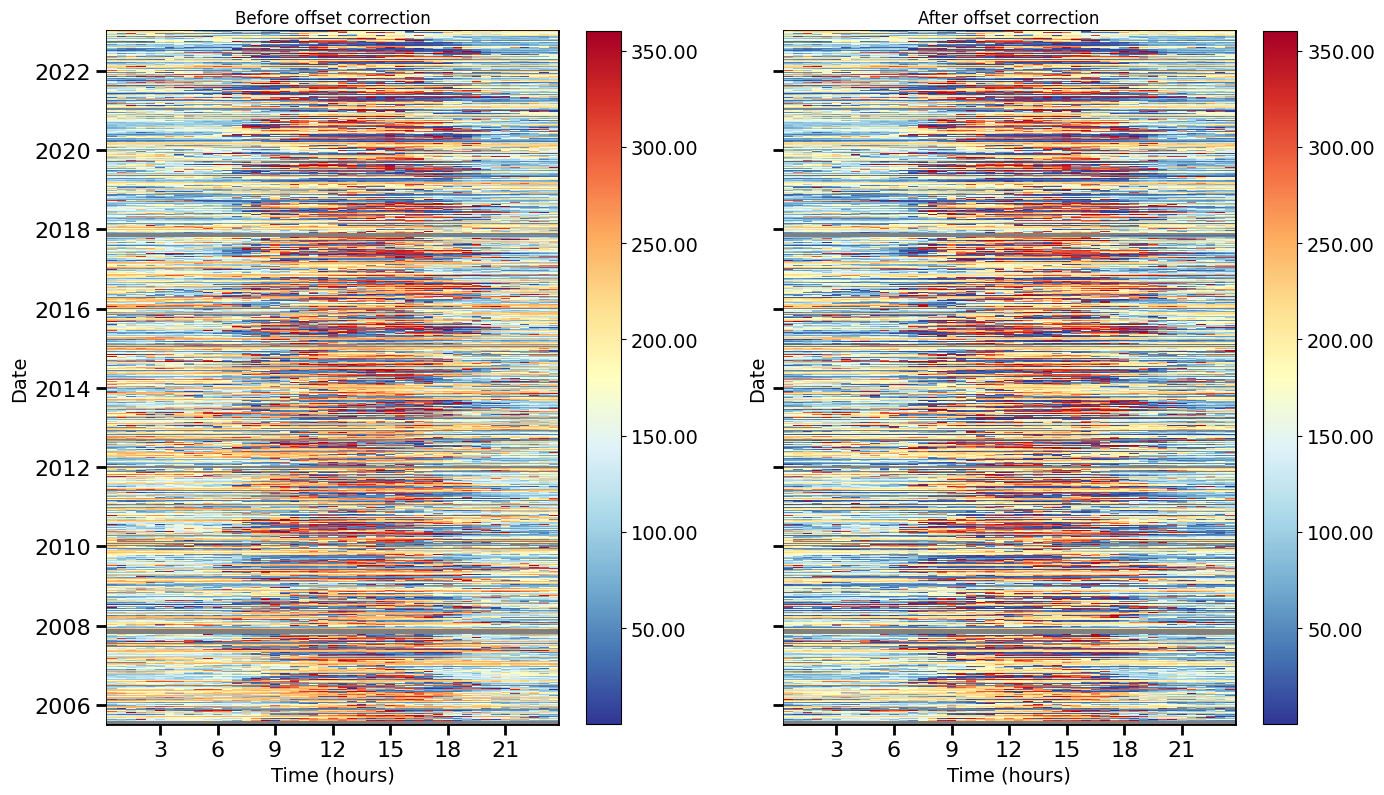

In [16]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 2)  # rows, cols
ax_before = fig.add_subplot(gs[0, 0])
ax_after = fig.add_subplot(gs[0, 1], sharey=ax_before)
HeatmapDateTime(ax=ax_before, series=winddir).plot()
HeatmapDateTime(ax=ax_after, series=winddir_corrected).plot()
ax_before.set_title("Before offset correction", color='black')
ax_after.set_title("After offset correction", color='black')
ax_after.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

# Finish

In [1]:
from datetime import datetime
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2023-04-23 18:46:46
